# Cost Complexity Pruning (CCP) of Decision Trees
In this notebook you learn:
- A review of the basics of Decision trees
- What is pruning?
- Types of pruning
- What is CCP?
- How to calculate factors for the CCP
- How to use CCP
- Pros and Cons of CCP

Loading required packages:

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Loading a sample dataset and split it to train test.

In [19]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

Train the DT without any limitation. This builds a pure DT!

In [20]:
cls_dt = DecisionTreeClassifier(random_state=0)
_ = cls_dt.fit(X_train, y_train)

Present the trained DT graphically.

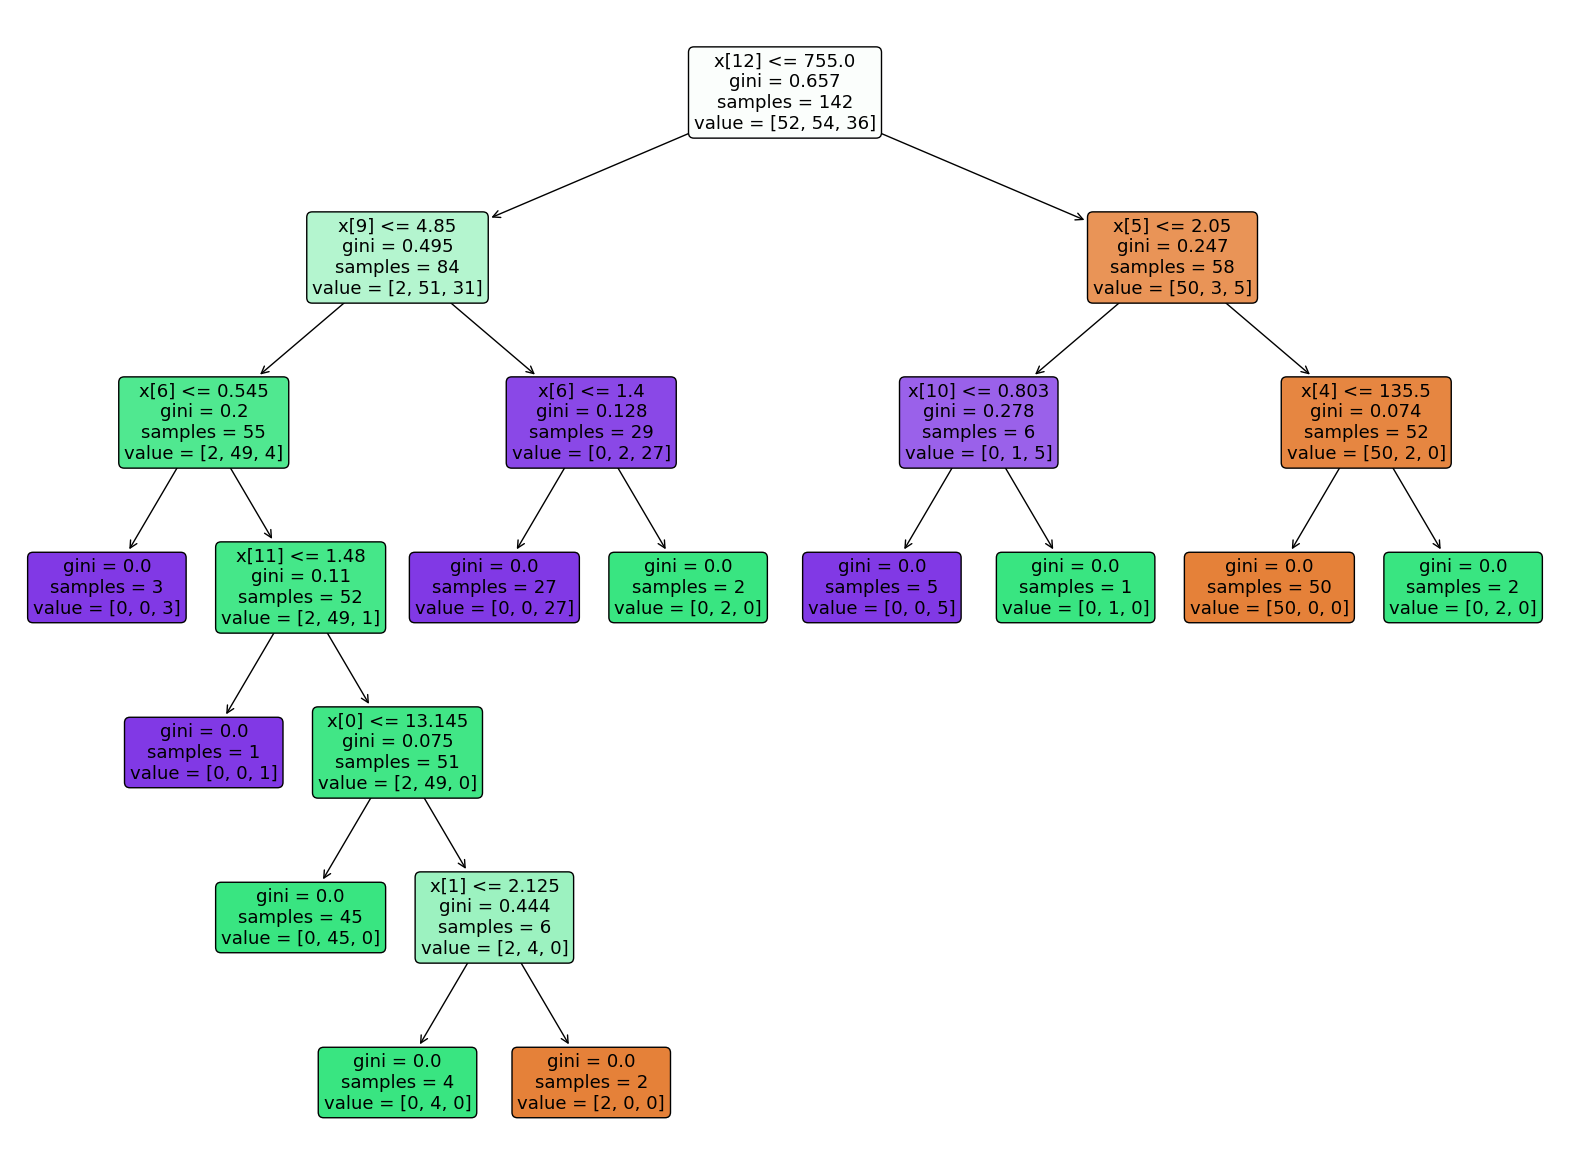

In [21]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(cls_dt, filled=True, rounded=True)

Automatically calculate CCP factors:

In [22]:
ccp_classifier = DecisionTreeClassifier(random_state=0)
path = ccp_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(F"Alpha values:\n{ccp_alphas}\n")
print(F"Impurities:\n{impurities}\n")

Alpha values:
[0.         0.01173709 0.01345251 0.02622632 0.02708559 0.03697922
 0.0619544  0.1890258  0.26364655]

Impurities:
[0.         0.01173709 0.05209462 0.07832094 0.10540653 0.14238575
 0.20434015 0.39336594 0.6570125 ]



Present the impurity-alpha relation graphically.

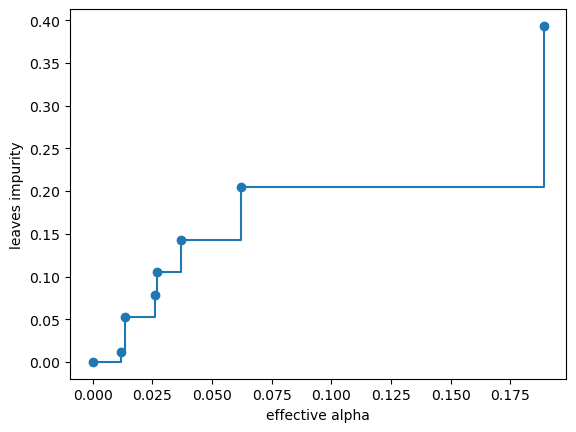

In [23]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
_=ax.set_ylabel("leaves impurity")

Train a decision tree for each alpha value. Sci-kit learn gets alpha value as an input paramter.

In [24]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Initial DT with a alpha value of zero is with no pruning. This is shown graphically here.

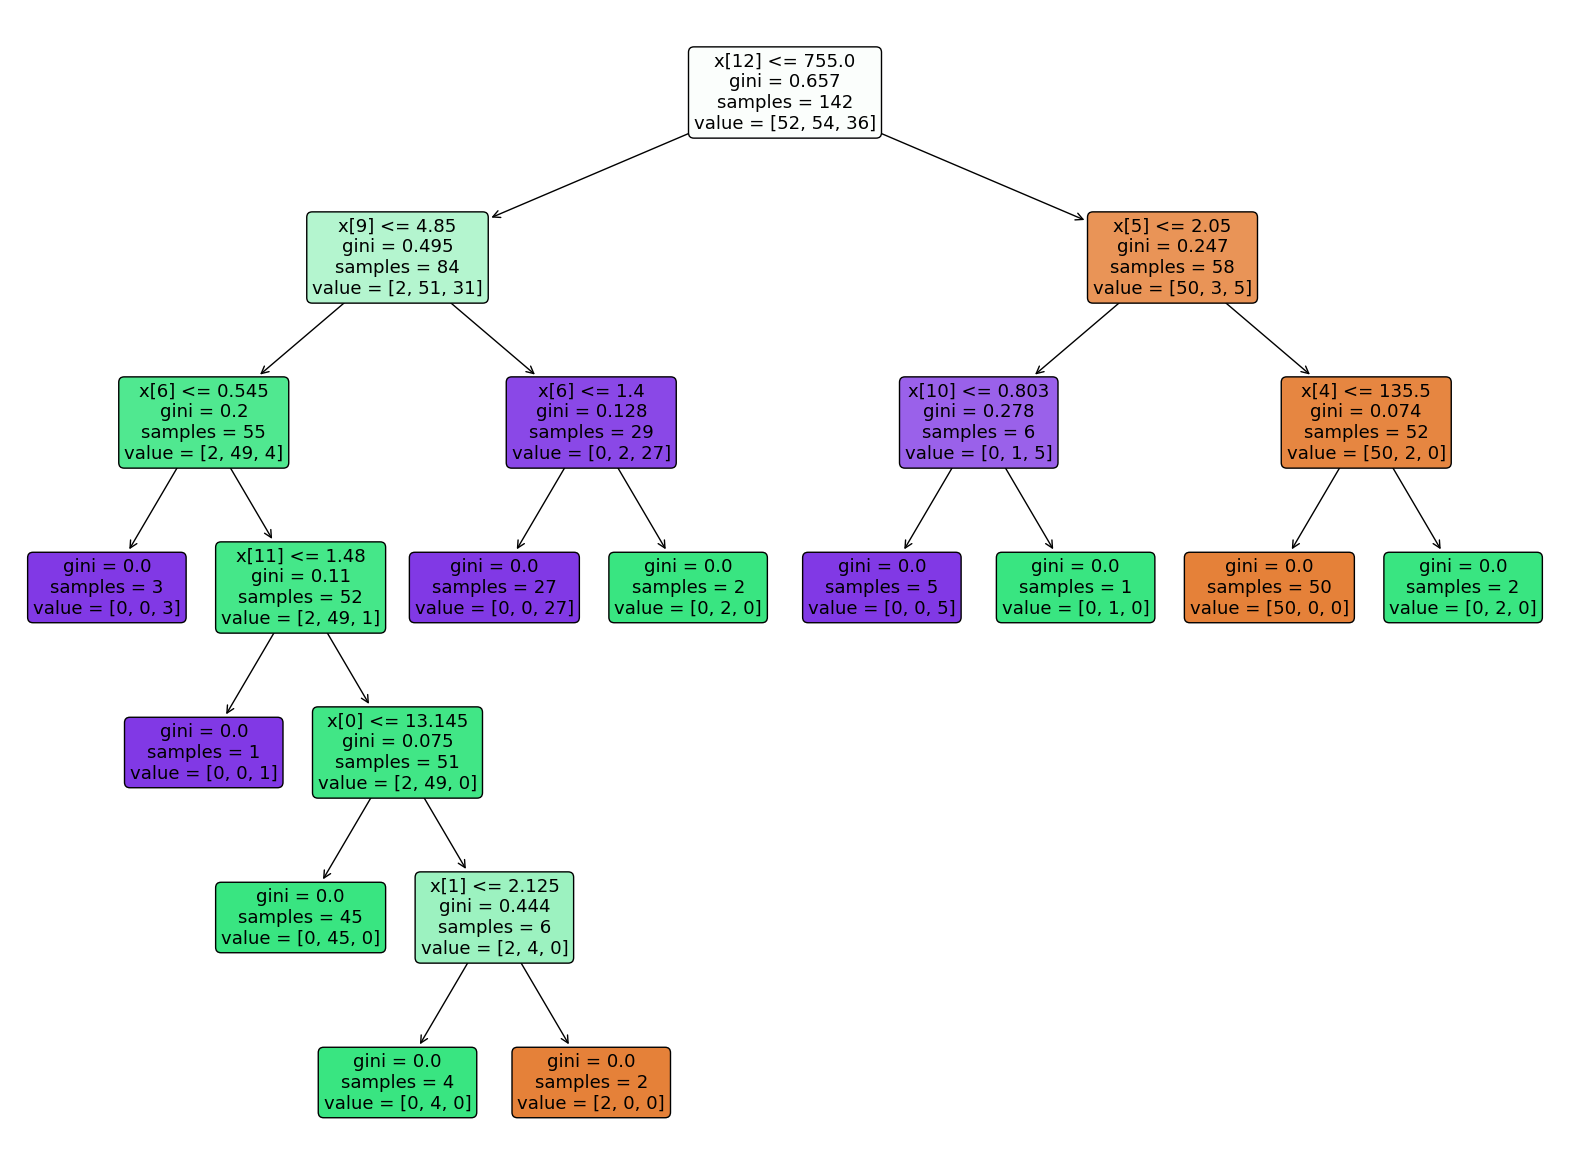

In [25]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(clfs[0], filled=True, rounded=True)

Checking the changes in different factors of the trained DT when pruned according to each alpha value.

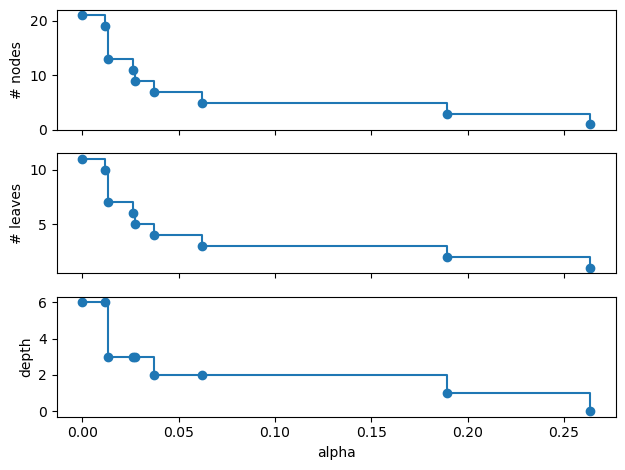

In [26]:
node_counts = [clf.tree_.node_count for clf in clfs]
leaf_counts = [clf.tree_.n_leaves for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_ylabel("# nodes")
ax[1].plot(ccp_alphas, leaf_counts, marker="o", drawstyle="steps-post")
ax[1].set_ylabel("# leaves")
ax[2].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[2].set_xlabel("alpha")
ax[2].set_ylabel("depth")
fig.tight_layout()

Cheking the way pruning has happened. Starting with the initial (base) DT:

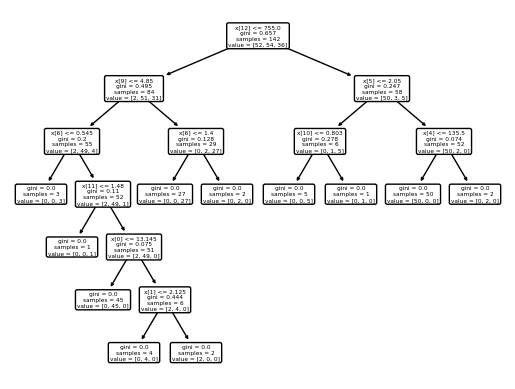

In [27]:
_ = tree.plot_tree(clfs[0], filled=False, rounded=True)

First removal of a branch. CCP finds the minimum ratio between cost-complexity which may not be in the deepest level!

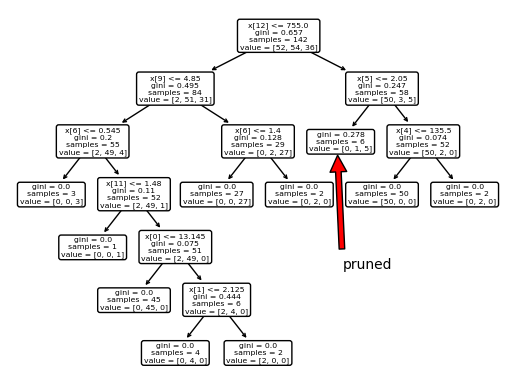

In [28]:
fig = plt.figure()
ax = fig.add_subplot()
_ = tree.plot_tree(clfs[1], filled=False, rounded=True)
_=ax.annotate('pruned', xy=(0.66, 0.62), xytext=(0.67, 0.3),
            arrowprops=dict(facecolor='red', shrink=0.05))

It is possible that multiple inner-nodes be removed at once while the higher node (and its related branch) has a lower ratio. This phenopmena can be seen here!

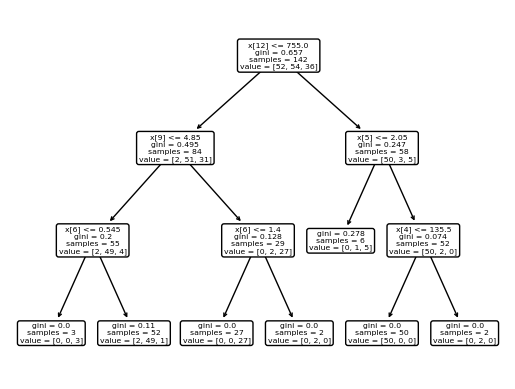

In [29]:
_ = tree.plot_tree(clfs[2], filled=False, rounded=True)

The last element of the alpha values removes the whole DT with only the root node remained. This is why this values is mostly ignored.

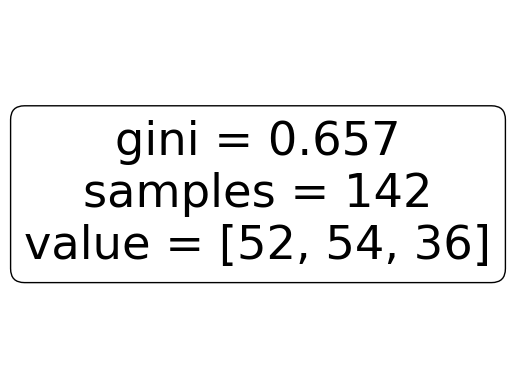

In [30]:
_ = tree.plot_tree(clfs[-1], filled=False, rounded=True)

## CCP to avoid overfitting

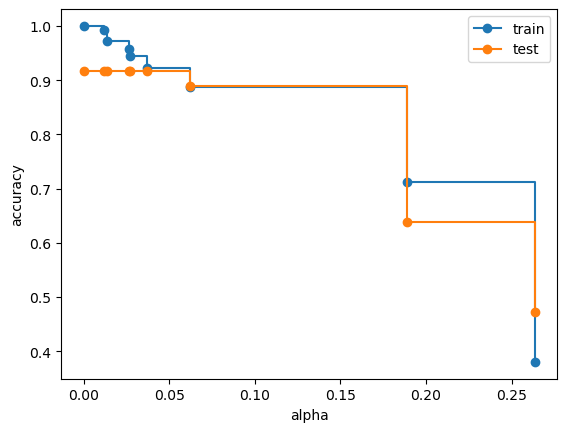

In [31]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
_=ax.legend()

In [32]:
from sklearn.datasets import load_breast_cancer 
X_ovf, y_ovf = load_breast_cancer(return_X_y=True)
X_train_ovf, X_test_ovf, y_train_ovf, y_test_ovf = train_test_split(X_ovf, y_ovf, test_size = 0.1, random_state=7)

In [33]:
ccp_cls_ovf = DecisionTreeClassifier(random_state=0)
path_ovf = ccp_cls_ovf.cost_complexity_pruning_path(X_train_ovf, y_train_ovf)
ccp_alphas_ovf, impurities_ovf = path_ovf.ccp_alphas, path_ovf.impurities
clfs_ovf = []
for ccp_alpha_ovf in ccp_alphas_ovf[:-1]:
    clf_ovf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha_ovf)
    clf_ovf.fit(X_train_ovf, y_train_ovf)
    clfs_ovf.append(clf_ovf)

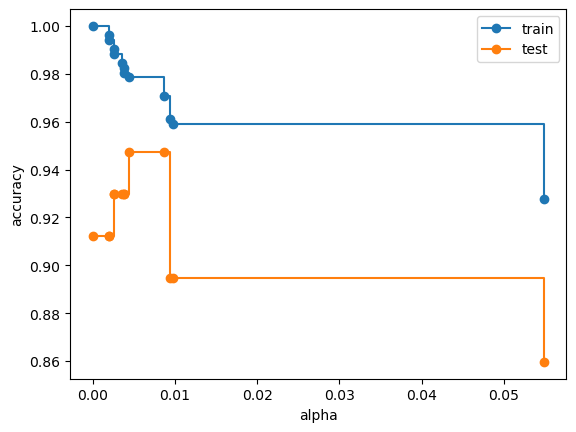

In [34]:
train_scores_ovf = [clf.score(X_train_ovf, y_train_ovf) for clf in clfs_ovf]
test_scores_ovf = [clf.score(X_test_ovf, y_test_ovf) for clf in clfs_ovf]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas_ovf[:-1], train_scores_ovf, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas_ovf[:-1], test_scores_ovf, marker="o", label="test", drawstyle="steps-post")
_=ax.legend()

## Further readings:
**Web**
- https://en.wikipedia.org/wiki/Decision_tree_pruning
- http://mlwiki.org/index.php/Cost-Complexity_Pruning
- https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
- https://online.stat.psu.edu/stat508/lesson/11/11.8/11.8.2

**Book**
- https://www.taylorfrancis.com/books/mono/10.1201/9781315139470/classification-regression-trees-leo-breiman
